In [1]:
%load_ext autoreload
%autoreload 2

import sys 
import os 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pincam')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pincam.utils import *
#from pml.shapedataframe import ShapeDataFrame
import pincam.pincam as cam 
from pincam.matrix_utils2 import MatrixUtils2 as mu
#import pincam.feature as af 

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Make test surfaces 
horsrf1 = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
versrf1 = np.array(
    [[-3, 0, 0], [3, 0, 0], [3, 0, 6], [0, 0, 9], [-3, 0, 6]])
versrf2 = np.array(
    [[-3, 2, 0], [3, 2, 0], [3, 2, 6], [0, 2, 9], [-3, 2, 6]])
versrf3 = np.array(
    [[-3, -2, 0], [3, -2, 0], [3, -2, 6], [0, -2, 9], [-3, -2, 6]])
horsrf2 = np.array(
    [[-5, -5, 9], [5, -5, 9], [5, 5, 9], [-5, 5, 9]])
versrf4 = np.array(
    [[-3, 0, 9], [3, 0, 9], [3, 0, 15], [0, 0, 18], [-3, 0, 15]])

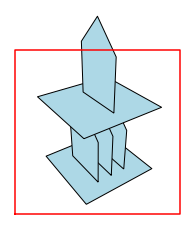

In [3]:
r = lambda d: d / 180. * np.pi
fov = r(35)
heading = r(55)
pitch = r(35)
cam_posn = np.array([0, -35, 4])
P, Rtc = cam.projection_matrix(
    fov, 5, heading, pitch, cam_posn)
geoms = [horsrf1, horsrf2, versrf1, versrf2, versrf3, versrf4]
xgeoms = cam.project_by_z(P, P, cam_posn, geoms, False)#[0:]

xgeoms = [mu.shapely_from_srf3d(srf) for srf in xgeoms]
df = gpd.GeoDataFrame({'geometry': xgeoms,
                       'color': np.arange(len(xgeoms))})
# Plot
f, a = plt.subplots(figsize=(4, 4))
df.plot(edgecolor='black', alpha=1, ax=a, facecolor='lightblue')
        #column='color')
b = cam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False)
_ = a.axis(False)


In [6]:
# Define surfaces
bottom_surface = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]]
)
top_surface = bottom_surface.copy()
top_surface[:,2] = 10
vertical_surface = np.array(
    [[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]])

geoms = [bottom_surface, top_surface, vertical_surface]
# Plot
fov = r(35)
heading = r(15)
pitch = r(25)
cam_posn = np.array([0, -35, 4])
P, Rtc = cam.projection_matrix(fov, 5, heading, pitch, cam_posn)
xgeoms = cam.project_by_z(P, P, cam_posn, geoms, False)#[0:]

# # Plot
# xgeoms = [mu.shapely_from_srf3d(srf) for srf in xgeoms]
# df = gpd.GeoDataFrame({'geometry': xgeoms,'color': np.arange(len(xgeoms))})
# f, a = plt.subplots(figsize=(4, 4))
# df.plot(edgecolor='black', alpha=1, ax=a, facecolor='lightblue')
# b = cam.sensor_bounds(100)
# a.plot(b[:,0], b[:,1], 'red')
# a.grid(False)
# _ = a.axis(False)

[array([[ 19.42634176, -36.19840711],
        [-31.16510699, -27.96121033],
        [-14.10866749,  -5.63464271],
        [ 25.93732709, -10.61351528]]),
 array([[ 18.35518671, -21.081233  ],
        [-17.39674995, -16.04042901],
        [-18.71740002,   9.08509537],
        [  0.        ,  26.62286934],
        [ 19.83153656,   5.13442237]]),
 array([[ 22.68117026,  15.87814324],
        [-35.9424611 ,  20.94720835],
        [-15.75017557,  34.08418287],
        [ 29.16340163,  31.22805151]])]